# 2021 Kaggle_Time Series_XGboost
By Vivian Zeng       01/17/2021

In [242]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [243]:
ls

Crossroads_Datathon-main/
Crossroads_Datathon-main (1).zip
Crossroads_Datathon-main 2/
Crossroads_Datathon-main.zip
DataDictionary.xlsx
Kaggle-Predict-Vivian-01132021.pdf
Kaggle-Predict-Vivian-AllBranches_0113.ipynb
Kaggle-Predict-Vivian-SplitBranches_0113.Rmd
Kaggle-Predict-Vivian-SplitBranches_0113.ipynb
Kaggle-Predict-Vivian-SplitBranches_0113.pdf
Kaggle-Predict-Vivian-SplitBranches_0117.Rmd
Kaggle-Predict-Vivian-SplitBranches_0117.ipynb
Kaggle-Predict-XGboost-Vivian-SplitBranches_0117.ipynb
Pre_Seasonality_V
Time Series-EDA-Vivian_0112.ipynb
Time Series-Predict.ipynb
Time Series.ipynb
__pycache__/
cv_results
dask-worker-space/
earth_data_plot.py
kaggle.csv
kaggle_ver1
seattle_weather_2012-2015.csv*
seattle_weather_2015_2016.csv*


In [244]:
kaggle = pd.read_csv("kaggle.csv")
kaggle.head()

,Unnamed: 0,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,1,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,3,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,4,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,5,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [245]:
kaggle=kaggle.drop(kaggle.columns[0], axis=1)
kaggle=kaggle[['BusinessDate', "BranchID","TotalCashUsed"]]
kaggle.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [246]:
# Convert date to a datetime object
kaggle.BusinessDate = pd.to_datetime(kaggle.BusinessDate)
kaggle.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [247]:
# Set date to be index
kaggle.set_index('BusinessDate', inplace = True)
kaggle.index

DatetimeIndex(['2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28',
               '2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24',
               '2020-07-23', '2020-07-22',
               ...
               '2010-01-10', '2010-01-09', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-05', '2010-01-04', '2010-01-03',
               '2010-01-02', '2010-01-01'],
              dtype='datetime64[ns]', name='BusinessDate', length=171230, freq=None)

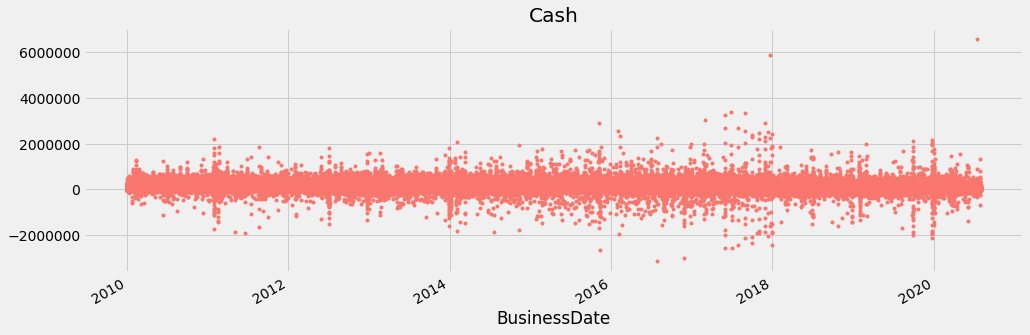

In [248]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = kaggle.TotalCashUsed.plot(style='.', figsize=(15,5), color=color_pal[0], title='Cash')

In [252]:
df=kaggle.loc['2019-01-01':'2020-07-31']

In [253]:
df=df[df['BranchID'] == 99]

In [254]:
df.shape

(576, 2)

In [255]:
df.head()

,BranchID,TotalCashUsed
BusinessDate,,
2020-07-31,99,-43718.13
2020-07-30,99,261410.14
2020-07-29,99,104922.70
2020-07-28,99,124024.48
2020-07-27,99,59077.37


In [405]:
split_date = '2020-5-15'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()

In [406]:
train.reset_index(inplace = True)
train.head(2)

,BusinessDate,BranchID,TotalCashUsed
0,2020-05-15,99,87363.60
1,2020-05-14,99,207134.45


In [407]:
test.reset_index(inplace = True)
test.head(2)

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14


In [409]:
test.shape

(77, 3)

In [410]:
#test.date = pd.to_numeric(test.date)

In [411]:
#print(test.dtypes)

In [412]:
#train.date = pd.to_numeric(train.date)

In [413]:
#print(train.dtypes)

In [414]:
# _ = test \
#     .rename(columns={'TotalCashUsed': 'TEST SET'}) \
#     .join(train.rename(columns={'TotalCashUsed': 'TRAINING SET'}), how='outer') \
#     .plot(figsize=(15,5), title='TotalCashUsed', style='.')

In [415]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['BusinessDate'] = df.BusinessDate
    df['hour'] = df['BusinessDate'].dt.hour
    df['dayofweek'] = df['BusinessDate'].dt.dayofweek
    df['quarter'] = df['BusinessDate'].dt.quarter
    df['month'] = df['BusinessDate'].dt.month
    df['year'] = df['BusinessDate'].dt.year
    df['dayofyear'] = df['BusinessDate'].dt.dayofyear
    df['dayofmonth'] = df['BusinessDate'].dt.day
    #df['weekofyear'] = df['date'].dt.isocalendar().week
    #df['BranchID']=df['BranchID']
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

In [416]:
X_train, y_train = create_features(train, label='TotalCashUsed')
X_test, y_test = create_features(test, label='TotalCashUsed')

In [417]:
X_train.head(2)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,4,2,5,2020,136,15
1,0,3,2,5,2020,135,14


In [418]:
X_train.shape

(499, 7)

In [419]:
y_train.shape

(499,)

In [420]:
y_train

0       87363.60
1      207134.45
2       71167.63
3      113230.82
4       50066.23
         ...    
494         0.00
495     29072.91
496    112373.81
497     63580.01
498    111853.80
Name: TotalCashUsed, Length: 499, dtype: float64

In [421]:
X_test.head(2)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,4,3,7,2020,213,31
1,0,3,3,7,2020,212,30


In [422]:
y_test

0     -43718.13
1     261410.14
2     104922.70
3     124024.48
4      59077.37
        ...    
72    105844.29
73     73780.28
74    124959.43
75     91758.17
76         0.00
Name: TotalCashUsed, Length: 77, dtype: float64

In [423]:
print(X_train.dtypes)
print(X_test.dtypes)

hour          int64
dayofweek     int64
quarter       int64
month         int64
year          int64
dayofyear     int64
dayofmonth    int64
dtype: object
hour          int64
dayofweek     int64
quarter       int64
month         int64
year          int64
dayofyear     int64
dayofmonth    int64
dtype: object


In [424]:
print(y_train.dtypes)
print(y_test.dtypes)

float64
float64


In [425]:
# X_train.weekofyear = pd.to_numeric(X_train.weekofyear)
# X_test.weekofyear = pd.to_numeric(X_test.weekofyear)

In [426]:
# print(X_train.dtypes)
# print(X_test.dtypes)

In [427]:
reg = xgb.XGBRegressor(n_estimators = 500, seed = 123)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

<Figure size 1080x720 with 0 Axes>

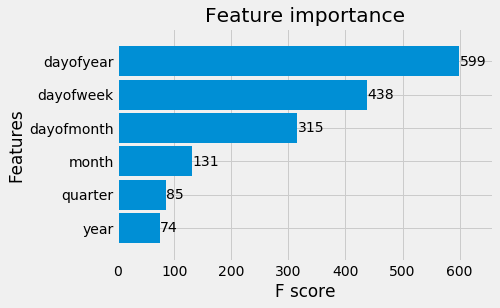

In [428]:
plt.figure(figsize=(15,10))
_ = plot_importance(reg, height=0.9)

In [429]:
#len(y_test)

In [430]:
#X_test.shape

In [431]:
y_pred = reg.predict(X_test)

In [432]:
np.sqrt(mean_squared_error(y_test,y_pred))
#56795.504460914424

52789.524593209695

In [433]:
mean_absolute_error(y_test,y_pred)
#38735.10017546106

35733.7176893338

In [434]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xgb.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xgb.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:squarederror"} 
  
xgb_r = xgb.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
pred = xgb_r.predict(test_dmatrix) 
  
# RMSE Computation 
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae=mean_absolute_error(y_test,pred)
print("RMSE : % f" %(rmse))
print("MAE : % f" %(mae))

RMSE :  68320.125545
MAE :  54565.353545
